# Global Power Plant Database

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Global_power_plant.csv')

In [3]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df['url']

0      http://www.nrel.gov/csp/solarpaces/project_det...
1                        http://www.ultratechcement.com/
2      https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...
3                                 http://www.cea.nic.in/
4                                 http://www.cea.nic.in/
                             ...                        
902                               http://www.cea.nic.in/
903                            http://karnatakapower.com
904    https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...
905                             http://www.hzlindia.com/
906    https://cdm.unfccc.int/Projects/DB/RWTUV134503...
Name: url, Length: 907, dtype: object

In [5]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [6]:
df.shape

(907, 27)

In [7]:
df.columns.tolist()

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'capacity_mw',
 'latitude',
 'longitude',
 'primary_fuel',
 'other_fuel1',
 'other_fuel2',
 'other_fuel3',
 'commissioning_year',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'wepp_id',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'generation_gwh_2019',
 'generation_data_source',
 'estimated_generation_gwh']

In [8]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


Mean>median of generation_gwh_2014,15,16,17,18 is greater
There is a difference between 75% and Max of Latitude, longitude,generation_gwh_2014,15,16,17,18
There are nan Values available in data

In [9]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [10]:
'''There are nun values availble in Latitude, Longitude, Other fuel1,2,3, comissioning year,geo source, wepp_id,Year capicity,generation_gwh2013,14,15,16,17,18,19,generation_data_source,Estimated_generation_gwh'''

'There are nun values availble in Latitude, Longitude, Other fuel1,2,3, comissioning year,geo source, wepp_id,Year capicity,generation_gwh2013,14,15,16,17,18,19,generation_data_source,Estimated_generation_gwh'

In [11]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

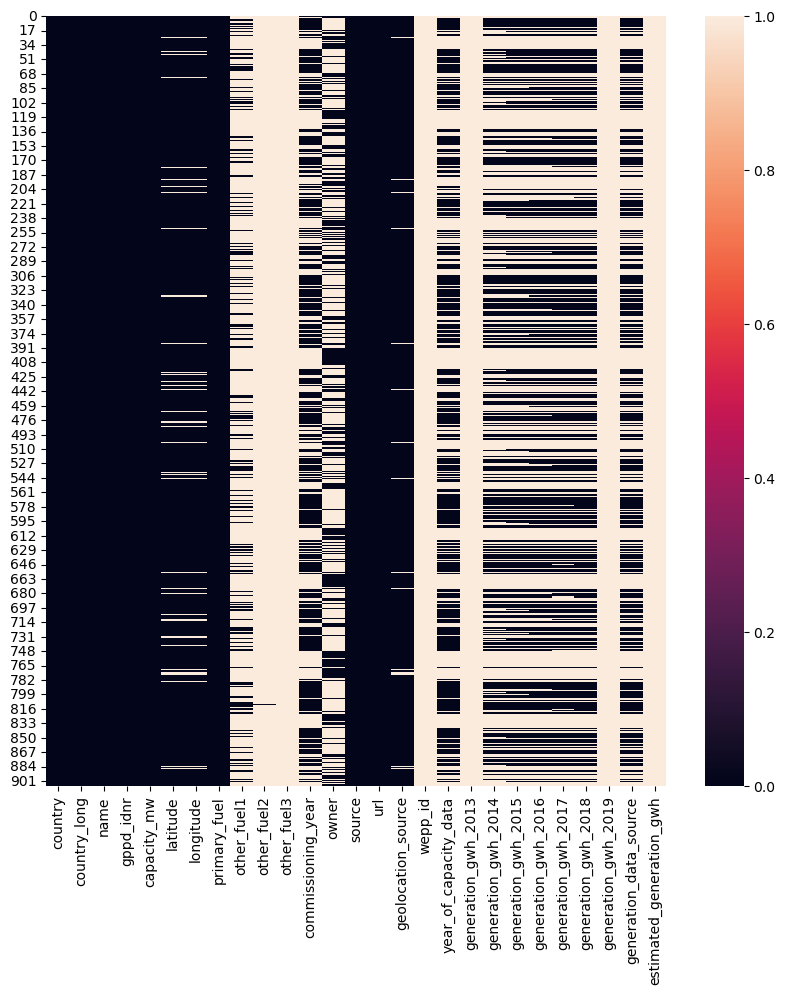

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())

In [13]:
df['country_long'].value_counts()

India    907
Name: country_long, dtype: int64

In [14]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [15]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


In [16]:
df['generation_data_source']

0                                NaN
1                                NaN
2                                NaN
3      Central Electricity Authority
4      Central Electricity Authority
                   ...              
902    Central Electricity Authority
903                              NaN
904                              NaN
905                              NaN
906                              NaN
Name: generation_data_source, Length: 907, dtype: object

In [17]:
from sklearn.impute import SimpleImputer

In [18]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [19]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [20]:
'''imp=SimpleImputer(strategy='mean')
for i in df.columns:
    if df[i].dtypes=='float64':
        df[i]=imp.fit_transform(df[i].values.reshape(-1,1))'''

"imp=SimpleImputer(strategy='mean')\nfor i in df.columns:\n    if df[i].dtypes=='float64':\n        df[i]=imp.fit_transform(df[i].values.reshape(-1,1))"

In [21]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [22]:
from sklearn.impute import SimpleImputer

In [23]:
imp=SimpleImputer(strategy='mean')

In [24]:
df['latitude']=imp.fit_transform(df['latitude'].values.reshape(-1,1))

In [25]:
df['latitude'].isnull().sum()

0

In [26]:
df['longitude']=imp.fit_transform(df['longitude'].values.reshape(-1,1))

In [27]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [28]:
df['commissioning_year']=imp.fit_transform(df['commissioning_year'].values.reshape(-1,1))
df['year_of_capacity_data']=imp.fit_transform(df['year_of_capacity_data'].values.reshape(-1,1))
df['generation_gwh_2014']=imp.fit_transform(df['generation_gwh_2014'].values.reshape(-1,1))
df['generation_gwh_2015']=imp.fit_transform(df['generation_gwh_2015'].values.reshape(-1,1))
df['generation_gwh_2016']=imp.fit_transform(df['generation_gwh_2016'].values.reshape(-1,1))
df['generation_gwh_2017']=imp.fit_transform(df['generation_gwh_2017'].values.reshape(-1,1))
df['generation_gwh_2018']=imp.fit_transform(df['generation_gwh_2018'].values.reshape(-1,1))


In [29]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year            0
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data         0
generation_gwh_2013         907
generation_gwh_2014           0
generation_gwh_2015           0
generation_gwh_2016           0
generation_gwh_2017           0
generation_gwh_2018           0
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [30]:
df.drop(['other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],axis=1,inplace=True)

In [31]:
#We are dropping out these columns because almost all columns doesn't contain any data, contains only nan data

In [32]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1               709
commissioning_year          0
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data       0
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_gwh_2018         0
generation_data_source    458
dtype: int64

In [33]:
df['other_fuel1'].fillna(df['other_fuel1'].mode()[0], inplace=True)
df['owner'].fillna(df['owner'].mode()[0], inplace=True)
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)
df['generation_data_source'].fillna(df['generation_data_source'].mode()[0], inplace=True)


In [34]:
df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

In [35]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,2011.000000,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,1997.091082,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,1997.091082,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Oil,2004.000000,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.000000,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.000000,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,2431.823590,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,Oil,1997.091082,...,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,Oil,1997.091082,...,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,Oil,1997.091082,...,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority


In [36]:
df['gppd_idnr'].value_counts()

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

In [37]:
df['owner'].value_counts()

Acc Acc ltd                                                    569
Sterling Agro Industries ltd.                                    4
Jk Cement ltd                                                    4
Maharashtra State Power Generation Co Ltd (MAHAGENCO)            3
Karnataka Power Corporation Limited                              3
                                                              ... 
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Energy Infratech Private Limited                                 1
K. N. Ram                                                        1
iEnergy Wind Farms                                               1
Name: owner, Length: 280, dtype: int64

In [38]:
df['year_of_capacity_data'].value_counts()

2019.0    907
Name: year_of_capacity_data, dtype: int64

In [39]:
df['generation_gwh_2014'].value_counts()

2431.82359    509
0.00000        28
359.13980       1
7368.39000      1
9983.01800      1
             ... 
1154.34200      1
451.05340       1
3239.14290      1
3155.00000      1
3194.35982      1
Name: generation_gwh_2014, Length: 372, dtype: int64

In [40]:
df['generation_data_source'].value_counts()

Central Electricity Authority    907
Name: generation_data_source, dtype: int64

In [41]:
#Country, country_long,year_of_capacity_data,generatio_data_source all these columns have same values of their respective fields

In [42]:
#Name and gppd_indr have all the unique values 

In [43]:
df.drop(['name','gppd_idnr'],axis=1,inplace=True)

In [44]:
df['url'].value_counts()

http://www.cea.nic.in/                                                              519
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                       7
http://www.ntpc.co.in                                                                 6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf      5
http://www.mahaurja.com/PDF/PG2_GridConnSPPCommissioned.pdf                           4
                                                                                   ... 
https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1346322352.66/view                       1
https://cdm.unfccc.int/Projects/DB/DNV-CUK1351166669.28/view                          1
http://harshaengineers.com                                                            1
http://hiragroup.com/companies/godawari-green-energy-limited/                         1
https://cdm.unfccc.int/Projects/DB/RWTUV1345031355.85/view                            1
Name: url, Length: 304, dtype: i

In [45]:
#Unvariate Analysis

In [46]:
df

,country,country_long,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,2.5,28.1839,73.2407,Solar,Oil,2011.000000,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
1,IND,India,98.0,24.7663,74.6090,Coal,Oil,1997.091082,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
2,IND,India,39.2,21.9038,69.3732,Wind,Oil,1997.091082,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
3,IND,India,135.0,23.8712,91.3602,Gas,Oil,2004.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,1800.0,21.9603,82.4091,Coal,Oil,2015.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,1600.0,16.2949,77.3568,Coal,Oil,2016.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,2431.823590,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,India,3.0,12.8932,78.1654,Solar,Oil,1997.091082,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
904,IND,India,25.5,15.2758,75.5811,Wind,Oil,1997.091082,Acc Acc ltd,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
905,IND,India,80.0,24.3500,73.7477,Coal,Oil,1997.091082,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority


<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

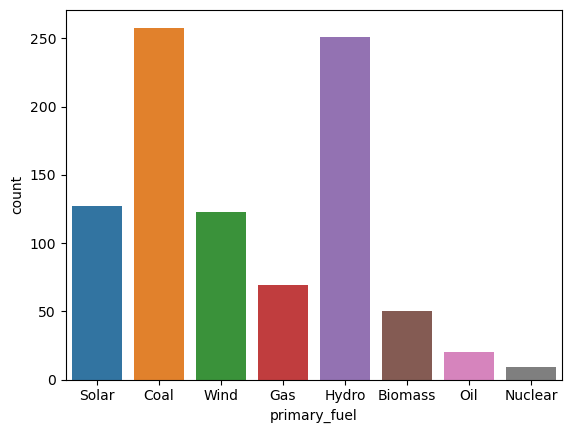

In [47]:
sns.countplot(df['primary_fuel'])

In [48]:
'''In most of the cases coal and hydro is used a primary fuel for electricity generation or export
Whereas Nuclear & Oil is the least 
Solar and Wind are also used as primary furl for electricity generation'''

'In most of the cases coal and hydro is used a primary fuel for electricity generation or export\nWhereas Nuclear & Oil is the least \nSolar and Wind are also used as primary furl for electricity generation'

In [49]:
df['other_fuel1'].value_counts()

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [50]:
df['owner'].value_counts()

Acc Acc ltd                                                    569
Sterling Agro Industries ltd.                                    4
Jk Cement ltd                                                    4
Maharashtra State Power Generation Co Ltd (MAHAGENCO)            3
Karnataka Power Corporation Limited                              3
                                                              ... 
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Energy Infratech Private Limited                                 1
K. N. Ram                                                        1
iEnergy Wind Farms                                               1
Name: owner, Length: 280, dtype: int64

In [51]:
df['generation_data_source'].value_counts()

Central Electricity Authority    907
Name: generation_data_source, dtype: int64

In [52]:
df['geolocation_source'].value_counts()

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

<AxesSubplot:xlabel='other_fuel1', ylabel='count'>

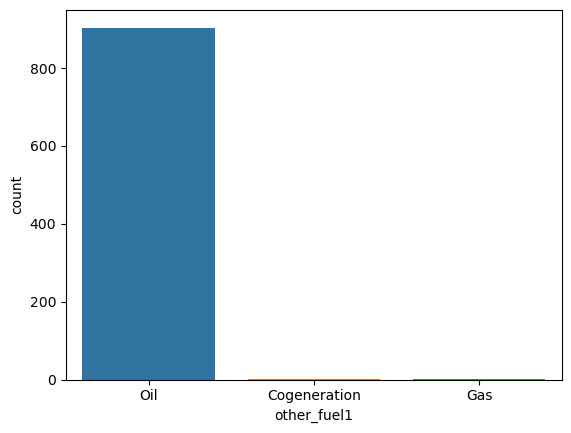

In [53]:
sns.countplot(df['other_fuel1'])

In [54]:
#In most of the cases oil is considered as most frequently used secondry fuel.

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

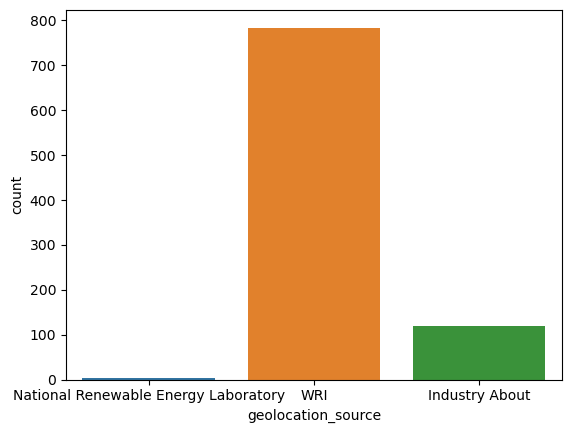

In [55]:
sns.countplot(df['geolocation_source'])

In [56]:
'''Most of the geolocation information is provided by WRI'''

'Most of the geolocation information is provided by WRI'

In [57]:
#Since Generation data source,country,country long have same values in all the column so we can drop it because it will not provide any usefulinformation 

In [58]:
df.drop('generation_data_source',axis=1,inplace=True)

In [59]:
df.drop(['country','country_long'],axis=1,inplace=True)

In [60]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,Oil,2011.000000,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,Coal,Oil,1997.091082,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,Wind,Oil,1997.091082,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,Gas,Oil,2004.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,2016.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,2431.823590,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,Oil,1997.091082,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,25.5,15.2758,75.5811,Wind,Oil,1997.091082,Acc Acc ltd,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,80.0,24.3500,73.7477,Coal,Oil,1997.091082,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


<AxesSubplot:xlabel='capacity_mw', ylabel='primary_fuel'>

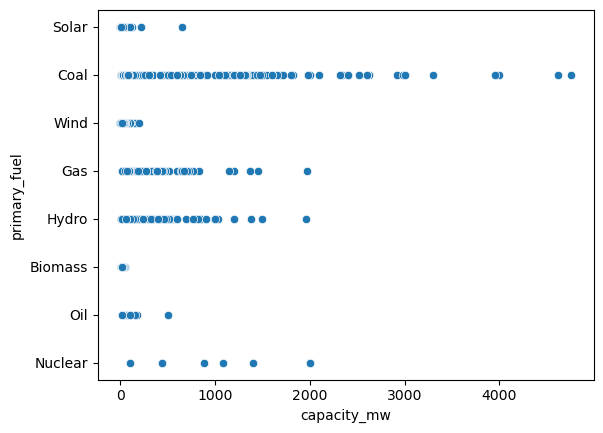

In [61]:
sns.scatterplot(x='capacity_mw',y='primary_fuel',data=df)

In [62]:
#Coal have the maximum electricity generating capacity whereas Biomass have the least, Gas and Hydro almost have same electricity generating capacity

<AxesSubplot:xlabel='primary_fuel', ylabel='commissioning_year'>

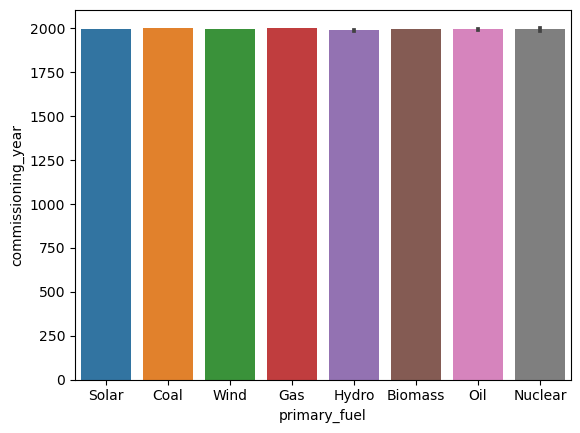

In [63]:
sns.barplot(x='primary_fuel',y='commissioning_year',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2014'>

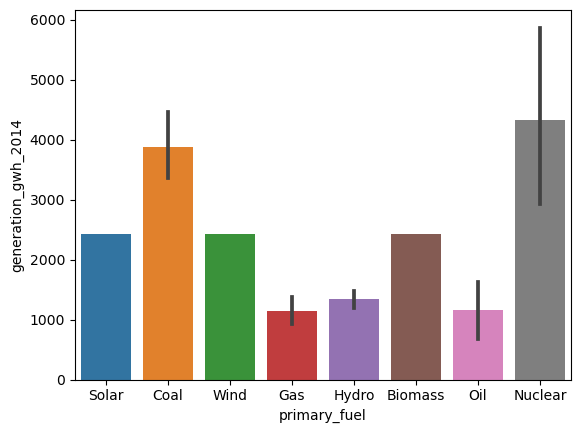

In [64]:
sns.barplot(x='primary_fuel',y='generation_gwh_2014',data=df)

In [65]:
#Nuclear created most electricity in year 2014 and then coal, Whereas gas created the least

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

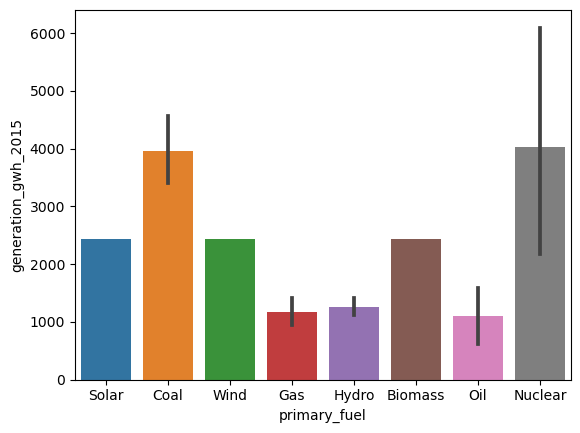

In [66]:
sns.barplot(x='primary_fuel',y='generation_gwh_2015',data=df)

In [67]:
#Coal and Nuclear almost created same electricity in the year 2015

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2016'>

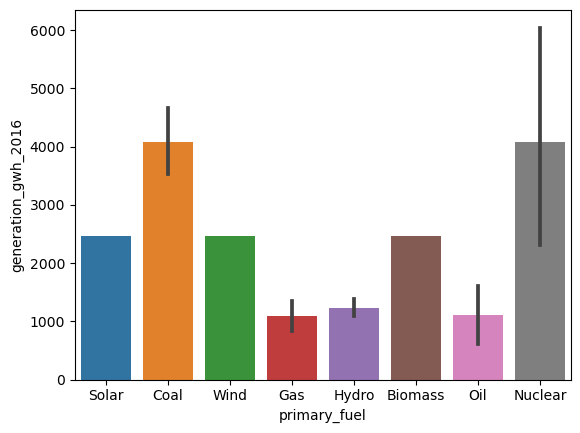

In [68]:
sns.barplot(x='primary_fuel',y='generation_gwh_2016',data=df)

In [69]:
#Coal and Nuclear almost created same electricity in the year 2016

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

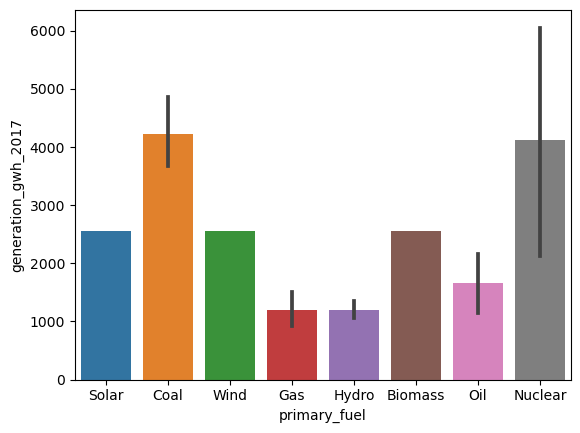

In [70]:
sns.barplot(x='primary_fuel',y='generation_gwh_2017',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2018'>

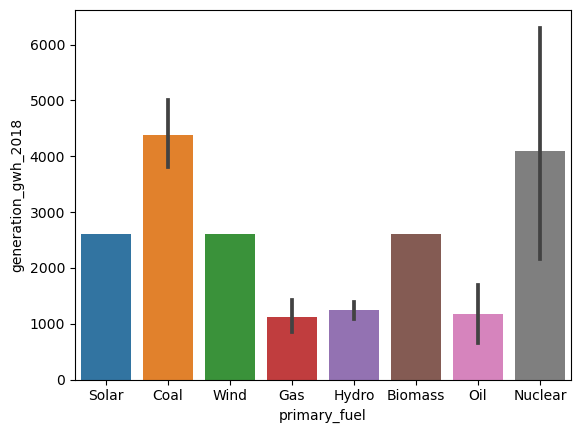

In [71]:
sns.barplot(x='primary_fuel',y='generation_gwh_2018',data=df)

In [72]:
#In almost all years Nuclear and Coal created same level of electricity and tops the list among all , whereas Solar,wind and Biomass also played major role in electricity ceration

In [73]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

<AxesSubplot:xlabel='commissioning_year', ylabel='generation_gwh_2014'>

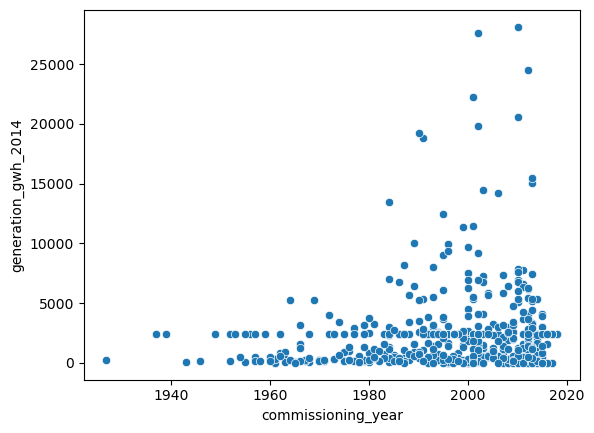

In [74]:
sns.scatterplot(x='commissioning_year',y='generation_gwh_2014',data=df)

In [75]:
df.skew()

capacity_mw              3.123576
latitude                -0.149698
longitude                1.141881
commissioning_year      -1.399359
year_of_capacity_data    0.000000
generation_gwh_2014      5.035446
generation_gwh_2015      5.364134
generation_gwh_2016      5.068427
generation_gwh_2017      5.110952
generation_gwh_2018      4.937907
dtype: float64

In [76]:
df['year_of_capacity_data'].value_counts()

2019.0    907
Name: year_of_capacity_data, dtype: int64

In [77]:
df.drop('year_of_capacity_data',axis=1,inplace=True)

In [78]:
df.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude              1.141881
commissioning_year    -1.399359
generation_gwh_2014    5.035446
generation_gwh_2015    5.364134
generation_gwh_2016    5.068427
generation_gwh_2017    5.110952
generation_gwh_2018    4.937907
dtype: float64

In [79]:
from scipy.stats import boxcox

In [80]:
df['generation_gwh_2015']=np.cbrt(df['generation_gwh_2015'])

In [81]:
df.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude              1.141881
commissioning_year    -1.399359
generation_gwh_2014    5.035446
generation_gwh_2015   -0.269579
generation_gwh_2016    5.068427
generation_gwh_2017    5.110952
generation_gwh_2018    4.937907
dtype: float64

In [82]:
df['generation_gwh_2016']=np.cbrt(df['generation_gwh_2016'])

In [83]:
df.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude              1.141881
commissioning_year    -1.399359
generation_gwh_2014    5.035446
generation_gwh_2015   -0.269579
generation_gwh_2016   -0.279323
generation_gwh_2017    5.110952
generation_gwh_2018    4.937907
dtype: float64

In [84]:
df['generation_gwh_2018']=np.sqrt(df['generation_gwh_2017'])

In [85]:
df.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude              1.141881
commissioning_year    -1.399359
generation_gwh_2014    5.035446
generation_gwh_2015   -0.269579
generation_gwh_2016   -0.279323
generation_gwh_2017    5.110952
generation_gwh_2018    0.893070
dtype: float64

In [86]:
df['generation_gwh_2018']=np.cbrt(df['generation_gwh_2018'])

In [87]:
df.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude              1.141881
commissioning_year    -1.399359
generation_gwh_2014    5.035446
generation_gwh_2015   -0.269579
generation_gwh_2016   -0.279323
generation_gwh_2017    5.110952
generation_gwh_2018   -1.889824
dtype: float64

In [88]:
df['capacity_mw']=np.cbrt(df['capacity_mw'])

In [89]:
df.skew()

capacity_mw            1.013378
latitude              -0.149698
longitude              1.141881
commissioning_year    -1.399359
generation_gwh_2014    5.035446
generation_gwh_2015   -0.269579
generation_gwh_2016   -0.279323
generation_gwh_2017    5.110952
generation_gwh_2018   -1.889824
dtype: float64

In [90]:
df['capacity_mw']=np.sqrt(df['capacity_mw'])

In [91]:
df.skew()

capacity_mw            0.518898
latitude              -0.149698
longitude              1.141881
commissioning_year    -1.399359
generation_gwh_2014    5.035446
generation_gwh_2015   -0.269579
generation_gwh_2016   -0.279323
generation_gwh_2017    5.110952
generation_gwh_2018   -1.889824
dtype: float64

In [92]:
df['generation_gwh_2014']=np.cbrt(df['generation_gwh_2014'])

In [93]:
df.skew()

capacity_mw            0.518898
latitude              -0.149698
longitude              1.141881
commissioning_year    -1.399359
generation_gwh_2014   -0.371187
generation_gwh_2015   -0.269579
generation_gwh_2016   -0.279323
generation_gwh_2017    5.110952
generation_gwh_2018   -1.889824
dtype: float64

In [94]:
df['generation_gwh_2017']=np.cbrt(df['generation_gwh_2017'])

In [95]:
df.skew()

capacity_mw            0.518898
latitude              -0.149698
longitude              1.141881
commissioning_year    -1.399359
generation_gwh_2014   -0.371187
generation_gwh_2015   -0.269579
generation_gwh_2016   -0.279323
generation_gwh_2017   -0.331857
generation_gwh_2018   -1.889824
dtype: float64

In [96]:
df.skew()

capacity_mw            0.518898
latitude              -0.149698
longitude              1.141881
commissioning_year    -1.399359
generation_gwh_2014   -0.371187
generation_gwh_2015   -0.269579
generation_gwh_2016   -0.279323
generation_gwh_2017   -0.331857
generation_gwh_2018   -1.889824
dtype: float64

In [97]:
df['generation_gwh_2018']=np.power(df['generation_gwh_2018'],2)

In [98]:
df.skew()

capacity_mw            0.518898
latitude              -0.149698
longitude              1.141881
commissioning_year    -1.399359
generation_gwh_2014   -0.371187
generation_gwh_2015   -0.269579
generation_gwh_2016   -0.279323
generation_gwh_2017   -0.331857
generation_gwh_2018   -0.331857
dtype: float64

In [99]:
df['longitude']=1/df['longitude']

In [100]:
df.skew()

capacity_mw            0.518898
latitude              -0.149698
longitude             -0.729609
commissioning_year    -1.399359
generation_gwh_2014   -0.371187
generation_gwh_2015   -0.269579
generation_gwh_2016   -0.279323
generation_gwh_2017   -0.331857
generation_gwh_2018   -0.331857
dtype: float64

In [101]:
df['longitude']=np.power(df['longitude'],2)

In [102]:
df.skew()

capacity_mw            0.518898
latitude              -0.149698
longitude             -0.531676
commissioning_year    -1.399359
generation_gwh_2014   -0.371187
generation_gwh_2015   -0.269579
generation_gwh_2016   -0.279323
generation_gwh_2017   -0.331857
generation_gwh_2018   -0.331857
dtype: float64

In [103]:
df['commissioning_year']=(df['commissioning_year'].rank())

In [104]:
df.skew()

capacity_mw            0.518898
latitude              -0.149698
longitude             -0.531676
commissioning_year     0.035973
generation_gwh_2014   -0.371187
generation_gwh_2015   -0.269579
generation_gwh_2016   -0.279323
generation_gwh_2017   -0.331857
generation_gwh_2018   -0.331857
dtype: float64

In [105]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
owner                  0
source                 0
url                    0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [106]:
from scipy.stats import zscore

In [107]:
z=np.abs(zscore(df[['capacity_mw','latitude','longitude','commissioning_year','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]))

In [108]:
threshold=3
np.where(z>3)

(array([333, 364, 364, 364, 364, 364, 493, 493, 493, 493, 493, 494, 494,
        494, 494, 494, 519, 648, 648, 648, 648, 648, 657, 657, 657, 695,
        695, 695, 695, 726, 726, 726, 726, 726, 786, 786, 786, 786, 786,
        808, 829, 880, 880, 880, 880, 880], dtype=int64),
 array([2, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 2, 4, 5, 6, 7, 8,
        4, 5, 6, 5, 6, 7, 8, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 5, 0, 4, 5, 6,
        7, 8], dtype=int64))

In [109]:
z=np.array(z)

In [110]:
z[333][2]

3.0346517038576217

In [111]:
df_new=df[(z<3).all(axis=1)]

In [112]:
df_new

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1.164993,28.1839,0.000186,Solar,Oil,767.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,13.447576,13.440944,13.513816,13.657969,13.657969
1,2.147193,24.7663,0.000180,Coal,Oil,415.5,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,13.447576,13.440944,13.513816,13.657969,13.657969
2,1.843095,21.9038,0.000208,Wind,Oil,415.5,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,13.447576,13.440944,13.513816,13.657969,13.657969
3,2.264934,23.8712,0.000120,Gas,Oil,689.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,8.516872,9.449397,9.604586,8.723154,8.723154
4,3.487751,21.9603,0.000147,Coal,Oil,852.5,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,14.479241,18.086385,18.413278,17.528476,17.528476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,3.419952,16.2949,0.000167,Coal,Oil,876.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,13.447576,0.998289,6.158697,9.529548,9.529548
903,1.200937,12.8932,0.000164,Solar,Oil,415.5,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,13.447576,13.440944,13.513816,13.657969,13.657969
904,1.715629,15.2758,0.000175,Wind,Oil,415.5,Acc Acc ltd,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,13.447576,13.440944,13.513816,13.657969,13.657969
905,2.075782,24.3500,0.000184,Coal,Oil,415.5,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,13.447576,13.440944,13.513816,13.657969,13.657969


In [113]:
loss=((df.shape[0]-df_new.shape[0])/df.shape[0]*100)

In [114]:
loss

1.4332965821389196

In [115]:
from sklearn.preprocessing import LabelEncoder

In [116]:
le=LabelEncoder()

In [117]:
for i in df_new.columns:
    if df_new[i].dtypes=='object':
        df_new[i]=le.fit_transform(df_new[i])    

In [118]:
df_new

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1.164993,28.1839,0.000186,6,2,767.0,229,109,128,1,13.447576,13.440944,13.513816,13.657969,13.657969
1,2.147193,24.7663,0.000180,1,2,415.5,257,173,172,2,13.447576,13.440944,13.513816,13.657969,13.657969
2,1.843095,21.9038,0.000208,7,2,415.5,2,21,204,2,13.447576,13.440944,13.513816,13.657969,13.657969
3,2.264934,23.8712,0.000120,2,2,689.0,5,22,58,2,8.516872,9.449397,9.604586,8.723154,8.723154
4,3.487751,21.9603,0.000147,1,2,852.5,5,22,58,2,14.479241,18.086385,18.413278,17.528476,17.528476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,3.419952,16.2949,0.000167,1,2,876.0,5,22,58,2,13.447576,0.998289,6.158697,9.529548,9.529548
903,1.200937,12.8932,0.000164,6,2,415.5,114,77,22,0,13.447576,13.440944,13.513816,13.657969,13.657969
904,1.715629,15.2758,0.000175,7,2,415.5,5,21,259,2,13.447576,13.440944,13.513816,13.657969,13.657969
905,2.075782,24.3500,0.000184,1,2,415.5,91,59,82,2,13.447576,13.440944,13.513816,13.657969,13.657969


In [119]:
df_new.cor=df_new.corr()
df_new.cor

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.061448,-0.315363,-0.516565,-0.034627,0.348417,-0.474449,-0.375736,-0.336669,0.414952,0.049575,0.042053,0.071276,0.077250,0.077250
latitude,0.061448,1.000000,0.007033,-0.005172,0.036642,0.073798,-0.065579,0.062780,-0.127605,-0.191262,0.063625,0.053473,0.071411,0.044232,0.044232
longitude,-0.315363,0.007033,1.000000,0.377175,-0.030131,-0.162827,0.309798,0.248744,0.320174,-0.280778,0.119671,0.134722,0.088415,0.108417,0.108417
primary_fuel,-0.516565,-0.005172,0.377175,1.000000,0.005525,-0.179859,0.277216,0.044696,0.587167,-0.480350,0.054892,0.058698,0.044536,0.055050,0.055050
other_fuel1,-0.034627,0.036642,-0.030131,0.005525,1.000000,0.021185,0.034205,0.026955,0.028540,-0.021641,0.043180,0.061182,0.074094,0.032937,0.032937
commissioning_year,0.348417,0.073798,-0.162827,-0.179859,0.021185,1.000000,-0.073205,-0.045229,-0.063286,0.048514,0.032748,0.043985,0.084394,0.054361,0.054361
owner,-0.474449,-0.065579,0.309798,0.277216,0.034205,-0.073205,1.000000,0.766948,0.416470,-0.378973,0.234188,0.247750,0.247995,0.245929,0.245929
source,-0.375736,0.062780,0.248744,0.044696,0.026955,-0.045229,0.766948,1.000000,0.155653,-0.501009,0.184553,0.195241,0.195433,0.193806,0.193806
url,-0.336669,-0.127605,0.320174,0.587167,0.028540,-0.063286,0.416470,0.155653,1.000000,-0.014012,0.195406,0.206722,0.206926,0.205203,0.205203
geolocation_source,0.414952,-0.191262,-0.280778,-0.480350,-0.021641,0.048514,-0.378973,-0.501009,-0.014012,1.000000,-0.148171,-0.156752,-0.156907,-0.155600,-0.155600


<AxesSubplot:>

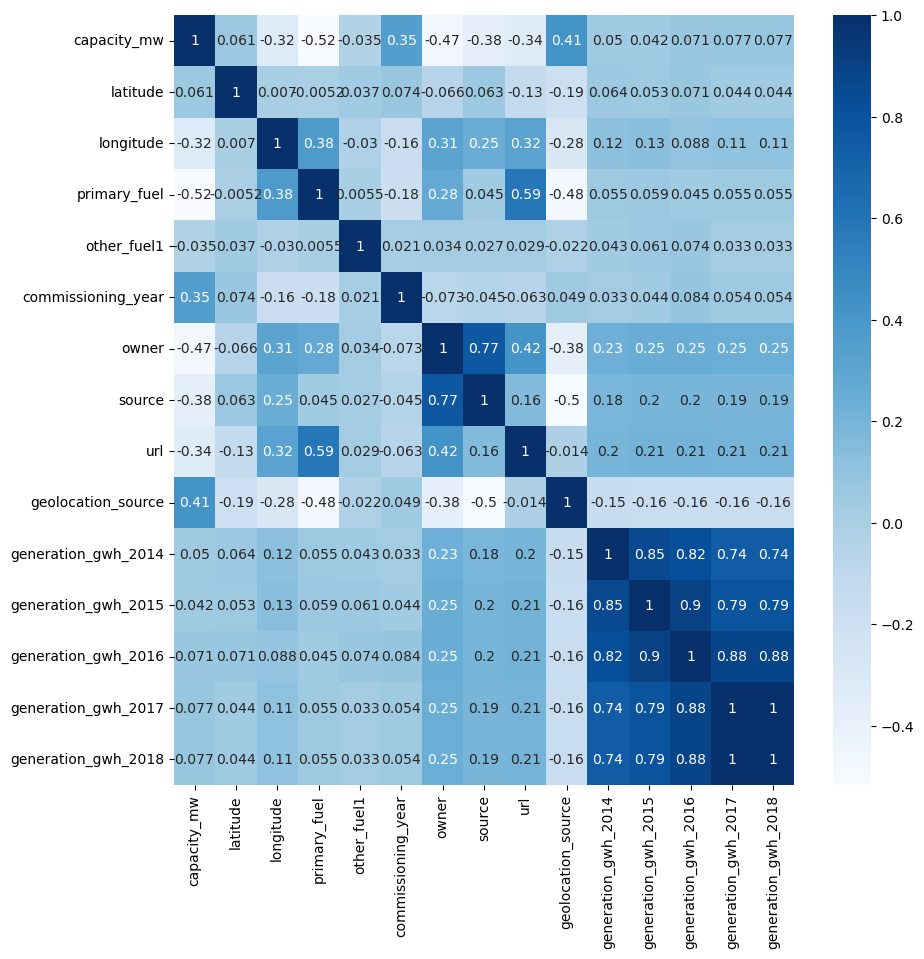

In [120]:
plt.figure(figsize=(10,10))
sns.heatmap(df_new.cor,annot=True,cmap='Blues')

In [121]:
'''generation_gwh_2017,generation_gwh_2018 shows very strong multi colinearity so we have decided to remove generation_gwh_2017'''

'generation_gwh_2017,generation_gwh_2018 shows very strong multi colinearity so we have decided to remove generation_gwh_2017'

In [122]:
x=df_new.drop(['primary_fuel','generation_gwh_2017'],axis=1)

In [123]:
x

,capacity_mw,latitude,longitude,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2018
0,1.164993,28.1839,0.000186,2,767.0,229,109,128,1,13.447576,13.440944,13.513816,13.657969
1,2.147193,24.7663,0.000180,2,415.5,257,173,172,2,13.447576,13.440944,13.513816,13.657969
2,1.843095,21.9038,0.000208,2,415.5,2,21,204,2,13.447576,13.440944,13.513816,13.657969
3,2.264934,23.8712,0.000120,2,689.0,5,22,58,2,8.516872,9.449397,9.604586,8.723154
4,3.487751,21.9603,0.000147,2,852.5,5,22,58,2,14.479241,18.086385,18.413278,17.528476
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,3.419952,16.2949,0.000167,2,876.0,5,22,58,2,13.447576,0.998289,6.158697,9.529548
903,1.200937,12.8932,0.000164,2,415.5,114,77,22,0,13.447576,13.440944,13.513816,13.657969
904,1.715629,15.2758,0.000175,2,415.5,5,21,259,2,13.447576,13.440944,13.513816,13.657969
905,2.075782,24.3500,0.000184,2,415.5,91,59,82,2,13.447576,13.440944,13.513816,13.657969


In [124]:
y=df_new['primary_fuel']

In [125]:
y.value_counts()

3    251
1    248
6    126
7    123
2     67
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

In [126]:
pip install imbalanced learn

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement imbalanced (from versions: none)
ERROR: No matching distribution found for imbalanced


In [127]:
from sklearn.preprocessing import StandardScaler

In [128]:
scaler=StandardScaler()

In [129]:
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [130]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [131]:
vif=pd.DataFrame()
vif['values']=[variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,values,Features
0,1.909821,capacity_mw
1,1.097327,latitude
2,1.278562,longitude
3,1.016687,other_fuel1
4,1.193692,commissioning_year
5,3.389248,owner
6,2.971146,source
7,1.543491,url
8,1.676009,geolocation_source
9,3.884778,generation_gwh_2014


In [132]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier,BaggingClassifier
from sklearn.svm import SVC

In [135]:
MaxAcc=0
MaxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    MaxAcc=acc
    MaxRS=i
print('MaxAcc=',acc,'MaxRS=',MaxRS)

MaxAcc= 0.7678275290215588 MaxRS= 99


In [136]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=MaxRS)

In [137]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(classification_report(y_test,predLR))
print(confusion_matrix(y_test,predLR))

0.7509293680297398
              precision    recall  f1-score   support

           0       0.64      0.58      0.61        12
           1       0.64      0.69      0.67        71
           2       0.25      0.05      0.09        19
           3       0.68      0.83      0.75        78
           4       0.00      0.00      0.00         2
           5       1.00      0.17      0.29         6
           6       1.00      0.95      0.98        43
           7       0.97      1.00      0.99        38

    accuracy                           0.75       269
   macro avg       0.65      0.53      0.54       269
weighted avg       0.73      0.75      0.73       269

[[ 7  4  0  1  0  0  0  0]
 [ 3 49  3 14  1  0  0  1]
 [ 1  4  1 13  0  0  0  0]
 [ 0 13  0 65  0  0  0  0]
 [ 0  1  0  1  0  0  0  0]
 [ 0  3  0  2  0  1  0  0]
 [ 0  2  0  0  0  0 41  0]
 [ 0  0  0  0  0  0  0 38]]


In [138]:
RFR=RandomForestClassifier()
RFR.fit(x_train,y_train)
predRFR=RFR.predict(x_test)
print(accuracy_score(y_test,predRFR))
print(confusion_matrix(y_test,predRFR))
print(classification_report(y_test,predRFR))

0.8438661710037175
[[10  2  0  0  0  0  0  0]
 [ 4 60  1  5  0  1  0  0]
 [ 1  6  5  6  0  1  0  0]
 [ 0  7  0 71  0  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  0  3  3  0  0  0  0]
 [ 0  0  0  0  0  0 43  0]
 [ 0  0  0  0  0  0  0 38]]
              precision    recall  f1-score   support

           0       0.67      0.83      0.74        12
           1       0.78      0.85      0.81        71
           2       0.56      0.26      0.36        19
           3       0.84      0.91      0.87        78
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6
           6       1.00      1.00      1.00        43
           7       1.00      1.00      1.00        38

    accuracy                           0.84       269
   macro avg       0.60      0.61      0.60       269
weighted avg       0.82      0.84      0.83       269



In [139]:
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
predETC=ETC.predict(x_test)
print(accuracy_score(y_test,predETC))
print(confusion_matrix(y_test,predETC))
print(classification_report(y_test,predETC))

0.8513011152416357
[[ 7  5  0  0  0  0  0  0]
 [ 2 62  1  5  0  1  0  0]
 [ 1  5  8  4  0  1  0  0]
 [ 0  9  0 69  0  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  0  1  2  1  2  0  0]
 [ 0  0  0  0  0  0 43  0]
 [ 0  0  0  0  0  0  0 38]]
              precision    recall  f1-score   support

           0       0.70      0.58      0.64        12
           1       0.75      0.87      0.81        71
           2       0.80      0.42      0.55        19
           3       0.86      0.88      0.87        78
           4       0.00      0.00      0.00         2
           5       0.50      0.33      0.40         6
           6       1.00      1.00      1.00        43
           7       1.00      1.00      1.00        38

    accuracy                           0.85       269
   macro avg       0.70      0.64      0.66       269
weighted avg       0.85      0.85      0.84       269



In [140]:
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
predGBC=GBC.predict(x_test)
print(accuracy_score(y_test,predGBC))
print(confusion_matrix(y_test,predGBC))
print(classification_report(y_test,predGBC))

0.8661710037174721
[[ 8  4  0  0  0  0  0  0]
 [ 1 63  3  4  0  0  0  0]
 [ 1  2  9  6  0  1  0  0]
 [ 0  3  3 72  0  0  0  0]
 [ 0  1  0  1  0  0  0  0]
 [ 0  0  4  2  0  0  0  0]
 [ 0  0  0  0  0  0 43  0]
 [ 0  0  0  0  0  0  0 38]]
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.86      0.89      0.88        71
           2       0.47      0.47      0.47        19
           3       0.85      0.92      0.88        78
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6
           6       1.00      1.00      1.00        43
           7       1.00      1.00      1.00        38

    accuracy                           0.87       269
   macro avg       0.62      0.62      0.62       269
weighted avg       0.84      0.87      0.85       269



In [141]:
ABC=AdaBoostClassifier()
ABC.fit(x_test,y_test)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.7174721189591078
[[ 0 12  0  0  0  0  0  0]
 [ 0 39  0 31  0  0  0  1]
 [ 0  2  0 17  0  0  0  0]
 [ 0  3  0 75  0  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  1  0  5  0  0  0  0]
 [ 0  2  0  0  0  0 41  0]
 [ 0  0  0  0  0  0  0 38]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.64      0.55      0.59        71
           2       0.00      0.00      0.00        19
           3       0.59      0.96      0.73        78
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6
           6       1.00      0.95      0.98        43
           7       0.97      1.00      0.99        38

    accuracy                           0.72       269
   macro avg       0.40      0.43      0.41       269
weighted avg       0.64      0.72      0.66       269



In [142]:
BC=BaggingClassifier()
BC.fit(x_test,y_test)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.9888475836431226
[[12  0  0  0  0  0  0  0]
 [ 1 70  0  0  0  0  0  0]
 [ 0  0 19  0  0  0  0  0]
 [ 0  1  0 77  0  0  0  0]
 [ 0  1  0  0  1  0  0  0]
 [ 0  0  0  0  0  6  0  0]
 [ 0  0  0  0  0  0 43  0]
 [ 0  0  0  0  0  0  0 38]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.97      0.99      0.98        71
           2       1.00      1.00      1.00        19
           3       1.00      0.99      0.99        78
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00        43
           7       1.00      1.00      1.00        38

    accuracy                           0.99       269
   macro avg       0.99      0.93      0.95       269
weighted avg       0.99      0.99      0.99       269



In [143]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.79182156133829
[[ 8  3  0  1  0  0  0  0]
 [ 2 57  0 10  0  1  0  1]
 [ 1  7  0 10  0  1  0  0]
 [ 0  9  0 69  0  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 1  2  0  3  0  0  0  0]
 [ 0  2  0  0  0  0 41  0]
 [ 0  0  0  0  0  0  0 38]]
              precision    recall  f1-score   support

           0       0.67      0.67      0.67        12
           1       0.70      0.80      0.75        71
           2       0.00      0.00      0.00        19
           3       0.74      0.88      0.81        78
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6
           6       1.00      0.95      0.98        43
           7       0.97      1.00      0.99        38

    accuracy                           0.79       269
   macro avg       0.51      0.54      0.52       269
weighted avg       0.73      0.79      0.76       269



In [144]:
from sklearn.model_selection import cross_val_score

In [145]:
cv=5
cv_score=cross_val_score(LR,x,y,cv=5)
print(cv_score)
print(cv_score.mean())
print("Differnece between cv score and accuracy score:",(accuracy_score(y_test,predLR))-(cv_score.mean()))

[0.74301676 0.7877095  0.77094972 0.76536313 0.80337079]
0.7740819785324211
Differnece between cv score and accuracy score: -0.02315261050268136


In [146]:
cv=5
cv_score=cross_val_score(RFR,x,y,cv=5)
print(cv_score)
print(cv_score.mean())
print("Difference between cv score and accuracy score:",(accuracy_score(y_test,predRFR)-(cv_score.mean())))

[0.84916201 0.87150838 0.87150838 0.82122905 0.88202247]
0.8590860586278325
Difference between cv score and accuracy score: -0.01521988762411497


In [147]:
cv=5
cv_score=cross_val_score(ETC,x,y,cv=5)
print(cv_score)
print(cv_score.mean())
print("Difference between cv score and accuracy score:",(accuracy_score(y_test,predETC)-(cv_score.mean())))

[0.82122905 0.8547486  0.8603352  0.84357542 0.87640449]
0.8512585525076893
Difference between cv score and accuracy score: 4.256273394631638e-05


In [148]:
cv=5
cv_score=cross_val_score(GBC,x,y,cv=5)
print(cv_score)
print(cv_score.mean())
print("Difference between cv score and accuracy score:",(accuracy_score(y_test,predGBC)-(cv_score.mean())))

[0.84916201 0.84357542 0.88268156 0.82681564 0.86516854]
0.8534806352394702
Difference between cv score and accuracy score: 0.012690368478001979


In [149]:
cv=5
cv_score=cross_val_score(ABC,x,y,cv=5)
print(cv_score)
print(cv_score.mean())
print("Difference between cv score and accuracy score:",(accuracy_score(y_test,predABC)-(cv_score.mean())))

[0.60335196 0.55307263 0.61452514 0.49162011 0.49438202]
0.5513903709748289
Difference between cv score and accuracy score: 0.16608174798427888


In [150]:
cv=5
cv_score=cross_val_score(BC,x,y,cv=5)
print(cv_score)
print(cv_score.mean())
print("Difference between cv score and accuracy score:",(accuracy_score(y_test,predBC)-(cv_score.mean())))

[0.81005587 0.8603352  0.87709497 0.82681564 0.88202247]
0.8512648295775531
Difference between cv score and accuracy score: 0.13758275406556952


In [151]:
cv=5
cv_score=cross_val_score(svc,x,y,cv=5)
print(cv_score)
print(cv_score.mean())
print("Difference between cv score and accuracy score:",(accuracy_score(y_test,predsvc)-(cv_score.mean())))

[0.77653631 0.83240223 0.77653631 0.79329609 0.83707865]
0.8031699202812128
Difference between cv score and accuracy score: -0.011348358942922854


In [152]:
#We are selecting RandomForestClassifier because difference accuracy is good and the difference between cv score & accuracy score is least

In [153]:
#HyperParameter Tuning

In [154]:
from sklearn.model_selection import GridSearchCV

In [155]:
parameters={'n_estimators':[1,10,23,14],
           'criterion':['gini','entropy'],
           'min_samples_split':[5],
           'n_jobs':[2,8,19,23],
           'random_state':[2,10,34,21]}

In [156]:
gscv=GridSearchCV(RFR,parameters,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [5],
                         'n_estimators': [1, 10, 23, 14],
                         'n_jobs': [2, 8, 19, 23],
                         'random_state': [2, 10, 34, 21]})

In [157]:
gscv.best_params_

{'criterion': 'entropy',
 'min_samples_split': 5,
 'n_estimators': 23,
 'n_jobs': 2,
 'random_state': 2}

In [158]:
Model=RandomForestClassifier(criterion='entropy',min_samples_split=5,n_estimators=23,n_jobs=2,random_state=2)

In [159]:
Model.fit(x_train,y_train)
predM=Model.predict(x_test)
print(accuracy_score(y_test,predM))
print(confusion_matrix(y_test,predM))
print(classification_report(y_test,predM))

0.8475836431226765
[[10  2  0  0  0  0  0  0]
 [ 2 61  1  6  0  1  0  0]
 [ 1  5  4  8  0  1  0  0]
 [ 0  7  0 71  0  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  0  3  2  0  1  0  0]
 [ 0  0  0  0  0  0 43  0]
 [ 0  0  0  0  0  0  0 38]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        12
           1       0.79      0.86      0.82        71
           2       0.50      0.21      0.30        19
           3       0.82      0.91      0.86        78
           4       0.00      0.00      0.00         2
           5       0.33      0.17      0.22         6
           6       1.00      1.00      1.00        43
           7       1.00      1.00      1.00        38

    accuracy                           0.85       269
   macro avg       0.65      0.62      0.63       269
weighted avg       0.82      0.85      0.83       269



In [160]:
import joblib

In [161]:
joblib.dump(Model,'Power_Primary_Fuel')


['Power_Primary_Fuel']

In [162]:
model=joblib.load('Power_Primary_Fuel')

In [163]:
predictions=Model.predict(x_test)
predictions

array([3, 3, 3, 6, 3, 3, 3, 3, 1, 0, 3, 1, 1, 3, 1, 3, 1, 2, 1, 6, 7, 6,
       3, 3, 6, 1, 0, 6, 7, 3, 7, 3, 3, 1, 1, 1, 1, 3, 1, 0, 3, 1, 3, 3,
       0, 2, 3, 7, 3, 0, 1, 1, 1, 1, 0, 3, 1, 7, 3, 3, 6, 3, 7, 2, 1, 3,
       1, 7, 1, 7, 1, 3, 6, 7, 6, 3, 7, 3, 7, 6, 7, 3, 3, 3, 1, 1, 3, 1,
       7, 6, 3, 6, 3, 6, 3, 3, 3, 3, 6, 7, 7, 3, 7, 6, 3, 1, 6, 3, 3, 3,
       3, 1, 5, 7, 6, 0, 3, 0, 6, 3, 3, 1, 3, 7, 6, 6, 1, 7, 6, 7, 0, 7,
       3, 3, 1, 7, 6, 2, 1, 1, 7, 7, 7, 3, 1, 1, 6, 1, 7, 6, 7, 6, 6, 1,
       6, 1, 2, 6, 1, 1, 1, 1, 1, 6, 6, 6, 1, 1, 1, 3, 3, 7, 3, 1, 1, 5,
       1, 1, 3, 3, 7, 3, 3, 6, 6, 3, 3, 0, 2, 7, 6, 3, 1, 1, 7, 3, 0, 1,
       3, 7, 1, 6, 1, 7, 3, 3, 3, 3, 3, 1, 1, 6, 1, 3, 3, 3, 1, 3, 3, 3,
       3, 1, 1, 0, 3, 0, 7, 1, 6, 7, 1, 3, 1, 5, 1, 1, 1, 1, 7, 1, 6, 3,
       3, 6, 2, 3, 6, 3, 3, 1, 6, 6, 7, 1, 3, 1, 3, 1, 1, 6, 6, 1, 1, 1,
       2, 7, 3, 1, 3])

In [164]:
conclusion=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,259,260,261,262,263,264,265,266,267,268
Predicted,3,3,3,6,3,3,3,3,1,0,...,6,6,1,1,1,2,7,3,1,3
Original,3,3,3,6,3,3,3,1,1,0,...,6,6,1,1,1,5,7,3,1,3


In [165]:
dfn=pd.read_csv('Global_power_plant.csv')

In [166]:
dfn

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
dfn.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [168]:
imp2=SimpleImputer(strategy='mean')

In [169]:
dfn['latitude']=imp.fit_transform(dfn['latitude'].values.reshape(-1,1))
dfn['longitude']=imp.fit_transform(dfn['longitude'].values.reshape(-1,1))
dfn['commissioning_year']=imp.fit_transform(dfn['commissioning_year'].values.reshape(-1,1))
dfn['year_of_capacity_data']=imp.fit_transform(dfn['year_of_capacity_data'].values.reshape(-1,1))
dfn['generation_gwh_2014']=imp.fit_transform(dfn['generation_gwh_2014'].values.reshape(-1,1))
dfn['generation_gwh_2015']=imp.fit_transform(dfn['generation_gwh_2015'].values.reshape(-1,1))
dfn['generation_gwh_2016']=imp.fit_transform(dfn['generation_gwh_2016'].values.reshape(-1,1))
dfn['generation_gwh_2017']=imp.fit_transform(dfn['generation_gwh_2017'].values.reshape(-1,1))
dfn['generation_gwh_2018']=imp.fit_transform(dfn['generation_gwh_2018'].values.reshape(-1,1))

In [170]:
dfn.drop(['other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],axis=1,inplace=True)

In [171]:
dfn['other_fuel1'].fillna(dfn['other_fuel1'].mode()[0], inplace=True)
dfn['owner'].fillna(dfn['owner'].mode()[0], inplace=True)
dfn['geolocation_source'].fillna(dfn['geolocation_source'].mode()[0], inplace=True)
dfn['generation_data_source'].fillna(dfn['generation_data_source'].mode()[0], inplace=True)


In [172]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
owner                  0
source                 0
url                    0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [173]:
dfn.drop(['name','gppd_idnr'],axis=1,inplace=True)

In [174]:
dfn

,country,country_long,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,2.5,28.1839,73.2407,Solar,Oil,2011.000000,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
1,IND,India,98.0,24.7663,74.6090,Coal,Oil,1997.091082,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
2,IND,India,39.2,21.9038,69.3732,Wind,Oil,1997.091082,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
3,IND,India,135.0,23.8712,91.3602,Gas,Oil,2004.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,1800.0,21.9603,82.4091,Coal,Oil,2015.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,1600.0,16.2949,77.3568,Coal,Oil,2016.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,2431.823590,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,India,3.0,12.8932,78.1654,Solar,Oil,1997.091082,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
904,IND,India,25.5,15.2758,75.5811,Wind,Oil,1997.091082,Acc Acc ltd,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
905,IND,India,80.0,24.3500,73.7477,Coal,Oil,1997.091082,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority


In [175]:
dfn.drop(['country','country_long','generation_data_source'],axis=1,inplace=True)

In [176]:
dfn

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,Oil,2011.000000,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,Coal,Oil,1997.091082,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,Wind,Oil,1997.091082,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,Gas,Oil,2004.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,2016.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,2431.823590,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,Oil,1997.091082,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,25.5,15.2758,75.5811,Wind,Oil,1997.091082,Acc Acc ltd,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,80.0,24.3500,73.7477,Coal,Oil,1997.091082,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [177]:
dfn.drop('year_of_capacity_data',axis=1,inplace=True)

In [178]:
dfn.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude              1.141881
commissioning_year    -1.399359
generation_gwh_2014    5.035446
generation_gwh_2015    5.364134
generation_gwh_2016    5.068427
generation_gwh_2017    5.110952
generation_gwh_2018    4.937907
dtype: float64

In [179]:
from scipy.stats import boxcox

In [180]:
dfn['generation_gwh_2015']=np.cbrt(dfn['generation_gwh_2015'])

In [181]:
dfn['generation_gwh_2016']=np.cbrt(dfn['generation_gwh_2016'])

In [182]:
dfn['generation_gwh_2018']=np.sqrt(dfn['generation_gwh_2017'])

In [183]:
dfn['generation_gwh_2018']=np.cbrt(dfn['generation_gwh_2018'])

In [184]:
df.skew()

capacity_mw            0.518898
latitude              -0.149698
longitude             -0.531676
commissioning_year     0.035973
generation_gwh_2014   -0.371187
generation_gwh_2015   -0.269579
generation_gwh_2016   -0.279323
generation_gwh_2017   -0.331857
generation_gwh_2018   -0.331857
dtype: float64

In [185]:
dfn['generation_gwh_2014']=np.cbrt(dfn['generation_gwh_2014'])

In [186]:
dfn['generation_gwh_2017']=np.cbrt(dfn['generation_gwh_2017'])

In [187]:
dfn['generation_gwh_2018']=np.power(dfn['generation_gwh_2018'],2)

In [188]:
dfn['longitude']=1/dfn['longitude']

In [189]:
dfn['longitude']=np.power(dfn['longitude'],2)

In [190]:
dfn['commissioning_year']=(dfn['commissioning_year'].rank())

In [191]:
dfn.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude             -0.531676
commissioning_year     0.035973
generation_gwh_2014   -0.371187
generation_gwh_2015   -0.269579
generation_gwh_2016   -0.279323
generation_gwh_2017   -0.331857
generation_gwh_2018   -0.331857
dtype: float64

In [192]:
dfn

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,0.000186,Solar,Oil,767.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,13.447576,13.440944,13.513816,13.657969,13.657969
1,98.0,24.7663,0.000180,Coal,Oil,415.5,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,13.447576,13.440944,13.513816,13.657969,13.657969
2,39.2,21.9038,0.000208,Wind,Oil,415.5,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,13.447576,13.440944,13.513816,13.657969,13.657969
3,135.0,23.8712,0.000120,Gas,Oil,689.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,8.516872,9.449397,9.604586,8.723154,8.723154
4,1800.0,21.9603,0.000147,Coal,Oil,852.5,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,14.479241,18.086385,18.413278,17.528476,17.528476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,0.000167,Coal,Oil,876.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,13.447576,0.998289,6.158697,9.529548,9.529548
903,3.0,12.8932,0.000164,Solar,Oil,415.5,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,13.447576,13.440944,13.513816,13.657969,13.657969
904,25.5,15.2758,0.000175,Wind,Oil,415.5,Acc Acc ltd,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,13.447576,13.440944,13.513816,13.657969,13.657969
905,80.0,24.3500,0.000184,Coal,Oil,415.5,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,13.447576,13.440944,13.513816,13.657969,13.657969


In [193]:
from scipy.stats import zscore

In [194]:
z1=np.abs(zscore(dfn[['latitude','longitude','commissioning_year','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]))

In [195]:
threshold=3
np.where(z1>3)

(array([333, 364, 364, 364, 364, 364, 493, 493, 493, 493, 493, 494, 494,
        494, 494, 494, 519, 648, 648, 648, 648, 648, 657, 657, 657, 695,
        695, 695, 695, 726, 726, 726, 726, 726, 786, 786, 786, 786, 786,
        808, 880, 880, 880, 880, 880], dtype=int64),
 array([1, 3, 4, 5, 6, 7, 3, 4, 5, 6, 7, 3, 4, 5, 6, 7, 1, 3, 4, 5, 6, 7,
        3, 4, 5, 4, 5, 6, 7, 3, 4, 5, 6, 7, 3, 4, 5, 6, 7, 4, 3, 4, 5, 6,
        7], dtype=int64))

In [196]:
dfn_new=dfn[(z1<3).all(axis=1)]

In [197]:
loss=((dfn.shape[0]-dfn_new.shape[0])/dfn.shape[0]*100)

In [198]:
loss

1.3230429988974641

In [199]:
from sklearn.preprocessing import LabelEncoder

In [200]:
le=LabelEncoder()

In [201]:
for i in dfn_new.columns:
    if dfn_new[i].dtypes=='object':
        dfn_new[i]=le.fit_transform(dfn_new[i])    

In [202]:
dfn_new

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,0.000186,6,2,767.0,229,109,128,1,13.447576,13.440944,13.513816,13.657969,13.657969
1,98.0,24.7663,0.000180,1,2,415.5,258,174,173,2,13.447576,13.440944,13.513816,13.657969,13.657969
2,39.2,21.9038,0.000208,7,2,415.5,2,21,205,2,13.447576,13.440944,13.513816,13.657969,13.657969
3,135.0,23.8712,0.000120,2,2,689.0,5,22,58,2,8.516872,9.449397,9.604586,8.723154,8.723154
4,1800.0,21.9603,0.000147,1,2,852.5,5,22,58,2,14.479241,18.086385,18.413278,17.528476,17.528476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,0.000167,1,2,876.0,5,22,58,2,13.447576,0.998289,6.158697,9.529548,9.529548
903,3.0,12.8932,0.000164,6,2,415.5,114,77,22,0,13.447576,13.440944,13.513816,13.657969,13.657969
904,25.5,15.2758,0.000175,7,2,415.5,5,21,260,2,13.447576,13.440944,13.513816,13.657969,13.657969
905,80.0,24.3500,0.000184,1,2,415.5,91,59,82,2,13.447576,13.440944,13.513816,13.657969,13.657969


In [203]:
dfn_new.cor=dfn_new.corr()
dfn_new.cor

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.046430,-0.237138,-0.398769,-0.000149,0.343462,-0.337724,-0.262135,-0.262184,0.223140,0.257615,0.273244,0.328249,0.351581,0.351581
latitude,0.046430,1.000000,0.007259,-0.007010,0.036521,0.073947,-0.068773,0.058250,-0.129229,-0.186498,0.062984,0.052809,0.070727,0.043583,0.043583
longitude,-0.237138,0.007259,1.000000,0.376652,-0.030140,-0.162797,0.308373,0.247084,0.319823,-0.279323,0.119596,0.134640,0.088338,0.108338,0.108338
primary_fuel,-0.398769,-0.007010,0.376652,1.000000,0.005594,-0.179910,0.279122,0.048082,0.587990,-0.481664,0.055350,0.059182,0.045033,0.055533,0.055533
other_fuel1,-0.000149,0.036521,-0.030140,0.005594,1.000000,0.021176,0.034228,0.026990,0.028583,-0.021718,0.043200,0.061201,0.074111,0.032958,0.032958
commissioning_year,0.343462,0.073947,-0.162797,-0.179910,0.021176,1.000000,-0.073351,-0.045502,-0.063478,0.048759,0.032683,0.043915,0.084320,0.054291,0.054291
owner,-0.337724,-0.068773,0.308373,0.279122,0.034228,-0.073351,1.000000,0.768729,0.417289,-0.382946,0.234330,0.247898,0.248143,0.246076,0.246076
source,-0.262135,0.058250,0.247084,0.048082,0.026990,-0.045502,0.768729,1.000000,0.157277,-0.504468,0.184780,0.195479,0.195672,0.194042,0.194042
url,-0.262184,-0.129229,0.319823,0.587990,0.028583,-0.063478,0.417289,0.157277,1.000000,-0.016235,0.195685,0.207015,0.207220,0.205494,0.205494
geolocation_source,0.223140,-0.186498,-0.279323,-0.481664,-0.021718,0.048759,-0.382946,-0.504468,-0.016235,1.000000,-0.148687,-0.157296,-0.157452,-0.156141,-0.156141


<AxesSubplot:>

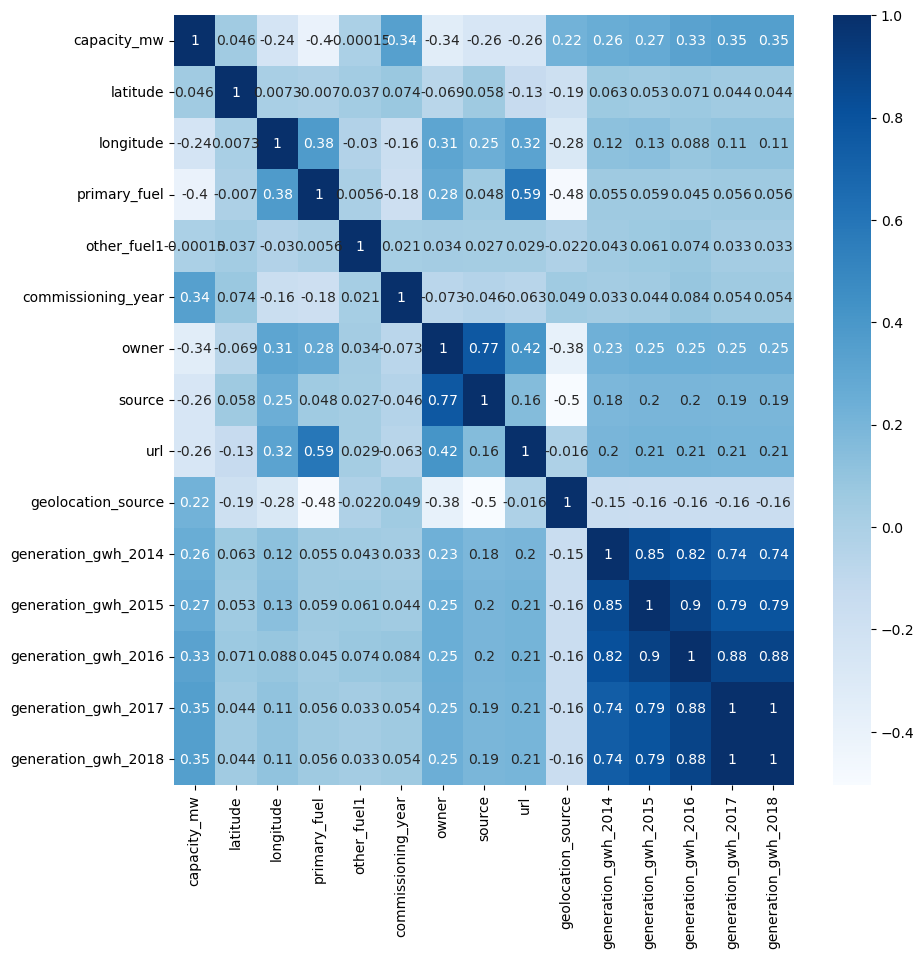

In [204]:
plt.figure(figsize=(10,10))
sns.heatmap(dfn_new.cor,annot=True,cmap='Blues')

In [205]:
dfn_new.cor=dfn_new.corr()
dfn_new.cor

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.046430,-0.237138,-0.398769,-0.000149,0.343462,-0.337724,-0.262135,-0.262184,0.223140,0.257615,0.273244,0.328249,0.351581,0.351581
latitude,0.046430,1.000000,0.007259,-0.007010,0.036521,0.073947,-0.068773,0.058250,-0.129229,-0.186498,0.062984,0.052809,0.070727,0.043583,0.043583
longitude,-0.237138,0.007259,1.000000,0.376652,-0.030140,-0.162797,0.308373,0.247084,0.319823,-0.279323,0.119596,0.134640,0.088338,0.108338,0.108338
primary_fuel,-0.398769,-0.007010,0.376652,1.000000,0.005594,-0.179910,0.279122,0.048082,0.587990,-0.481664,0.055350,0.059182,0.045033,0.055533,0.055533
other_fuel1,-0.000149,0.036521,-0.030140,0.005594,1.000000,0.021176,0.034228,0.026990,0.028583,-0.021718,0.043200,0.061201,0.074111,0.032958,0.032958
commissioning_year,0.343462,0.073947,-0.162797,-0.179910,0.021176,1.000000,-0.073351,-0.045502,-0.063478,0.048759,0.032683,0.043915,0.084320,0.054291,0.054291
owner,-0.337724,-0.068773,0.308373,0.279122,0.034228,-0.073351,1.000000,0.768729,0.417289,-0.382946,0.234330,0.247898,0.248143,0.246076,0.246076
source,-0.262135,0.058250,0.247084,0.048082,0.026990,-0.045502,0.768729,1.000000,0.157277,-0.504468,0.184780,0.195479,0.195672,0.194042,0.194042
url,-0.262184,-0.129229,0.319823,0.587990,0.028583,-0.063478,0.417289,0.157277,1.000000,-0.016235,0.195685,0.207015,0.207220,0.205494,0.205494
geolocation_source,0.223140,-0.186498,-0.279323,-0.481664,-0.021718,0.048759,-0.382946,-0.504468,-0.016235,1.000000,-0.148687,-0.157296,-0.157452,-0.156141,-0.156141


<AxesSubplot:>

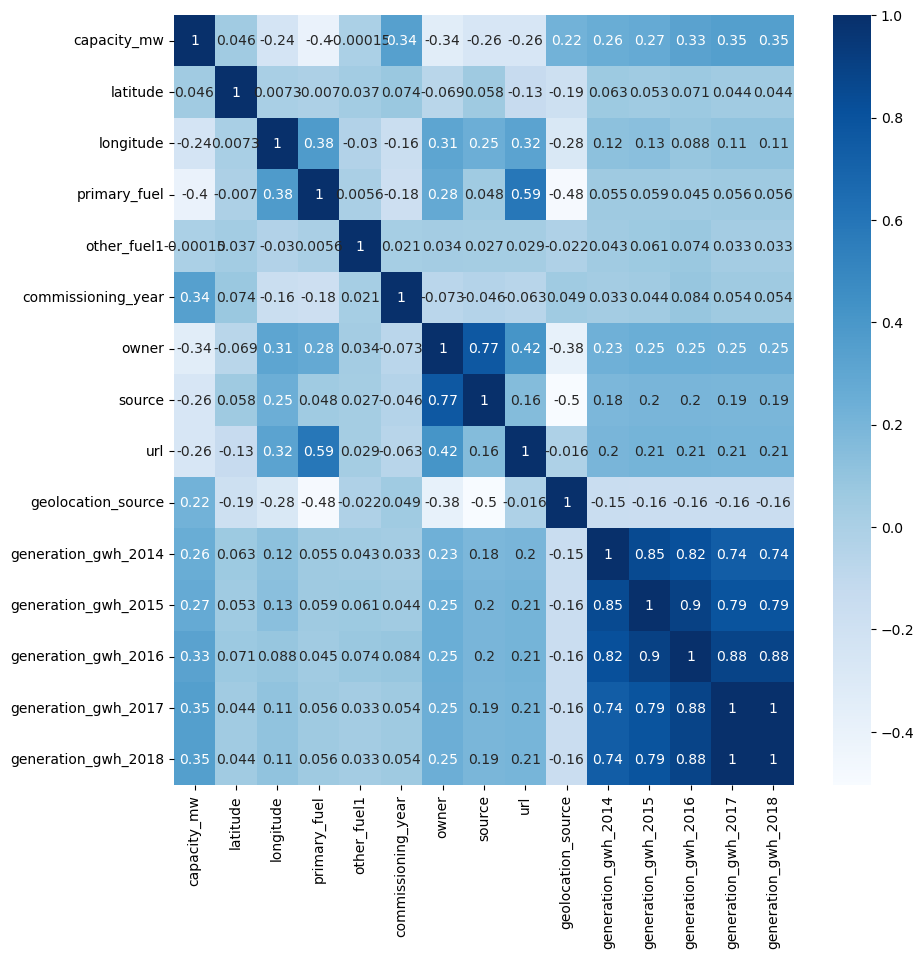

In [206]:
plt.figure(figsize=(10,10))
sns.heatmap(dfn_new.cor,annot=True,cmap='Blues')

In [207]:
x=dfn_new.drop(['capacity_mw','generation_gwh_2017'],axis=1)

In [208]:
y=dfn_new['capacity_mw']

In [209]:
x.shape

(895, 13)

In [210]:
y.shape

(895,)

In [211]:
x

,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2018
0,28.1839,0.000186,6,2,767.0,229,109,128,1,13.447576,13.440944,13.513816,13.657969
1,24.7663,0.000180,1,2,415.5,258,174,173,2,13.447576,13.440944,13.513816,13.657969
2,21.9038,0.000208,7,2,415.5,2,21,205,2,13.447576,13.440944,13.513816,13.657969
3,23.8712,0.000120,2,2,689.0,5,22,58,2,8.516872,9.449397,9.604586,8.723154
4,21.9603,0.000147,1,2,852.5,5,22,58,2,14.479241,18.086385,18.413278,17.528476
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,16.2949,0.000167,1,2,876.0,5,22,58,2,13.447576,0.998289,6.158697,9.529548
903,12.8932,0.000164,6,2,415.5,114,77,22,0,13.447576,13.440944,13.513816,13.657969
904,15.2758,0.000175,7,2,415.5,5,21,260,2,13.447576,13.440944,13.513816,13.657969
905,24.3500,0.000184,1,2,415.5,91,59,82,2,13.447576,13.440944,13.513816,13.657969


In [212]:
y

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 895, dtype: float64

In [213]:
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [214]:
vif=pd.DataFrame()
vif['values']=[variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,values,Features
0,1.092470,latitude
1,1.292069,longitude
2,3.587564,primary_fuel
3,1.015099,other_fuel1
4,1.086335,commissioning_year
5,3.356068,owner
6,3.925262,source
7,2.651270,url
8,3.003223,geolocation_source
9,3.879726,generation_gwh_2014


In [215]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import ExtraTreeRegressor,DecisionTreeRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN

In [216]:
MaxAcc=0
MaxRS=0
for i in range(1,200): 
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>MaxAcc:
        MaxAcc=acc
        MaxRS=i

In [217]:
print('MaxAcc=',MaxAcc,'MaxRS=',MaxRS)

MaxAcc= 0.5502887547275352 MaxRS= 93


In [218]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=MaxRS)

In [219]:
LR=LinearRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print('r2_score=',r2_score(y_test,predLR))
print('Mean absolute error=',mean_absolute_error(y_test,predLR))
print('Mean Squared Error=',mean_absolute_error(y_test,predLR))
print('RMSE=',np.sqrt(mean_squared_error(y_test,predLR)))

r2_score= 0.5502887547275352
Mean absolute error= 219.32411033026224
Mean Squared Error= 219.32411033026224
RMSE= 296.1564222950425


In [220]:
ETC=ExtraTreeRegressor()
ETC.fit(x_train,y_train)
predETC=ETC.predict(x_test)
print('r2 score=',r2_score(y_test,predETC))
print('Mean Absolute Error=',mean_absolute_error(y_test,predETC))
print('Mean squared Error=',mean_squared_error(y_test,predETC))
print('RMSE=',np.sqrt(mean_squared_error(y_test,predETC)))

r2 score= 0.6798572868988342
Mean Absolute Error= 125.37005204460965
Mean squared Error= 62438.46008872119
RMSE= 249.87688986523182


In [221]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
predDTR=DTR.predict(x_test)
print('r2 score=',r2_score(y_test,predDTR))
print('Mean Absolute Error=',mean_absolute_error(y_test,predDTR))
print('Mean squared error=',mean_squared_error(y_test,predDTR))
print('RMSE=',np.sqrt(mean_squared_error(y_test,predDTR)))

r2 score= 0.6528223648982571
Mean Absolute Error= 126.8189591078067
Mean squared error= 67711.1676321264
RMSE= 260.2136960886694


In [222]:
LA=Lasso()
LA.fit(x_train,y_train)
predLA=LA.predict(x_test)
print('r2 score=',r2_score(y_test,predLA))
print('Mean absolute error=',mean_absolute_error(y_test,predLA))
print('Mean squared error=',mean_squared_error(y_test,predLA))
print('RMSE=',np.sqrt(mean_squared_error(y_test,predLA)))

r2 score= 0.5499498868698552
Mean absolute error= 219.12508260013905
Mean squared error= 87774.71695169022
RMSE= 296.2679816512244


In [223]:
RD=Ridge()
RD.fit(x_train,y_train)
predRD=RD.predict(x_test)
print('r2 score=',r2_score(y_test,predRD))
print('Mean absolute error=',mean_absolute_error(y_test,predRD))
print('Mean squared error=',mean_squared_error(y_test,predRD))
print('RMSE=',np.sqrt(mean_squared_error(y_test,predRD)))

r2 score= 0.5501869021073991
Mean absolute error= 219.28212133718205
Mean squared error= 87728.49110976352
RMSE= 296.18995781383865


In [224]:
knn=KNN()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print('r2 score=',r2_score(y_test,predknn))
print('Mean absolute error=',mean_absolute_error(y_test,predknn))
print('Mean Squared Error=',mean_squared_error(y_test,predknn))
print('RMSE:',np.sqrt(mean_squared_error(y_test,predknn)))

r2 score= 0.7531760626143462
Mean absolute error= 107.39758810408924
Mean Squared Error= 48138.86411503346
RMSE: 219.40570666013556


In [225]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
predRFR=RFR.predict(x_test)
print('r2 score:',r2_score(y_test,predRFR))
print('Mean Absolute Error:',mean_absolute_error(y_test,predRFR))
print('Mean Squared Error:',mean_squared_error(y_test,predRFR))
print('RMSE:',np.sqrt(mean_squared_error(y_test,predRFR)))

r2 score: 0.8184701613016039
Mean Absolute Error: 93.32137417419011
Mean Squared Error: 35404.346638682015
RMSE: 188.16042792968454


In [227]:
from sklearn.model_selection import cross_val_score

In [228]:
scoreLR=cross_val_score(LR,x,y,cv=5)
print(scoreLR)
print(scoreLR.mean())
print('Difference Between cross val score and r2 score:',(r2_score(y_test,predLR)-(scoreLR.mean()))),

[0.43832181 0.44286206 0.41029931 0.53828038 0.46430756]
0.45881422518838877
Difference Between cross val score and r2 score: 0.09147452953914648


(None,)

In [229]:
scoreETC=cross_val_score(ETC,x,y,cv=5)
print(scoreETC)
print(scoreETC.mean())
print('Difference between cv score and r2 score:',(r2_score(y_test,predETC)-(scoreETC.mean())))

[0.64698953 0.50269511 0.6669418  0.65723515 0.59052124]
0.6128765653979842
Difference between cv score and r2 score: 0.06698072150085


In [230]:
scoreDTR=cross_val_score(DTR,x,y,cv=5)
print(scoreDTR)
print(scoreDTR.mean())
print('Difference between cv score and r2 score:',(r2_score(y_test,predDTR)-(scoreDTR.mean())))

[0.60801207 0.34846009 0.59453627 0.53166965 0.57194186]
0.5309239883339248
Difference between cv score and r2 score: 0.12189837656433222


In [231]:
scoreLA=cross_val_score(LA,x,y,cv=5)
print(scoreLA)
print(scoreLA.mean())
print('Difference between cv score and r2 score:',(r2_score(y_test,predLA)-(scoreLA.mean())))

[0.44365083 0.4430836  0.41045892 0.54196055 0.46609047]
0.4610488758116128
Difference between cv score and r2 score: 0.08890101105824244


In [232]:
scoreRD=cross_val_score(RD,x,y,cv=5)
print(scoreRD)
print(scoreRD.mean())
print('Difference between cv score and r2 score:',(r2_score(y_test,predRD)-(scoreRD.mean())))

[0.43878769 0.44341745 0.41012218 0.53857796 0.46449193]
0.4590794426247111
Difference between cv score and r2 score: 0.09110745948268795


In [233]:
scoreknn=cross_val_score(knn,x,y,cv=5)
print(scoreknn)
print(scoreknn.mean())
print('Difference between cv score and r2 score:',(r2_score(y_test,predknn)-(scoreknn.mean())))

[0.77500769 0.75791596 0.55518221 0.74133788 0.72135447]
0.7101596407323296
Difference between cv score and r2 score: 0.0430164218820166


In [234]:
scoreRFR=cross_val_score(RFR,x,y,cv=5)
print(scoreRFR)
print(scoreRFR.mean())
print('Difference between cv score and r2 score:',(r2_score(y_test,predRFR)-(scoreRFR.mean())))

[0.78123025 0.84930209 0.7165073  0.76358449 0.7740925 ]
0.7769433237902433
Difference between cv score and r2 score: 0.04152683751136055


In [235]:
#We are selecting RFR as our model becuase Accuracy is high among all and difference between cv score and r2 score is lowest

In [236]:
parameters={'n_estimators':[1,9,10,23],
           'max_depth':[2,10,23,4],
           'bootstrap':[True],
           'n_jobs':[1,4,10,12],
           'random_state':[1,5,9,10]}

In [237]:
from sklearn.model_selection import GridSearchCV

In [238]:
gscv=GridSearchCV(RFR,parameters,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [2, 10, 23, 4],
                         'n_estimators': [1, 9, 10, 23],
                         'n_jobs': [1, 4, 10, 12],
                         'random_state': [1, 5, 9, 10]})

In [239]:
gscv.best_params_

{'bootstrap': True,
 'max_depth': 23,
 'n_estimators': 23,
 'n_jobs': 1,
 'random_state': 10}

In [240]:
Model=RandomForestRegressor(bootstrap=True,max_depth=23,n_estimators=23,n_jobs=1,random_state=10)

In [241]:
Model.fit(x_train,y_train)
predM=Model.predict(x_test)
print('r2 score:',r2_score(y_test,predM))
print('Mean absolute Error:',mean_absolute_error(y_test,predM))
print('Mean Squared Error:',mean_squared_error(y_test,predM))
print('RMSE:',np.sqrt(mean_squared_error(y_test,predM)))

r2 score: 0.789817386266226
Mean absolute Error: 97.90181704331802
Mean Squared Error: 40992.58924819664
RMSE: 202.46626693895612


In [242]:
import joblib

In [244]:
joblib.dump(Model,'Power')

['Power']

In [245]:
model=joblib.load('Power')

In [246]:
loaded_model=joblib.load('Temperature')
y_pred=loaded_model.predict(x_test)
test_score=r2_score(y_test,y_pred)
print('Test_r2_score:',test_score*100)

Test_r2_score: 78.9817386266226


In [247]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,259,260,261,262,263,264,265,266,267,268
Predicted,2379.565217,48.53913,22.730435,43.820435,9.308696,162.522826,50.860145,37.231304,124.925217,20.743478,...,49.29,1184.782609,25.976087,114.994783,8.347246,202.173913,10.386957,37.236929,10.528502,378.320435
Original,2340.000000,40.00000,221.000000,46.000000,8.500000,180.000000,300.000000,23.100000,99.000000,20.000000,...,38.50,1140.000000,2.250000,60.000000,5.000000,250.000000,9.300000,12.000000,36.300000,272.300000
